# Decision Trees for Regression

## Import the Dataset

In [21]:
# Load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

the dataset is already loaded into my VScode space

In [22]:
#Load the dataset

#Import libraries
from tabulate import tabulate
import pandas as pd

df = pd.read_csv("column_data_5000_clean.csv", sep=";", header=0)

#Print the dataframe to check it
print(tabulate(df, headers='keys', tablefmt='psql'))

+------+-------------------+-----------------------+-----------------------+-------------------------------+--------------------------+-----------+
|      | Name              |   Number_of_columns_X |   Number_of_columns_Y |   Column_spacing_minimum_(mm) |   Beam_span_maximum_(mm) |   Y_label |
|------+-------------------+-----------------------+-----------------------+-------------------------------+--------------------------+-----------|
|    0 | Structure_3_0_3   |                     5 |                     5 |                          1000 |                     7000 |  0.645614 |
|    1 | Structure_4_0_3   |                     6 |                     5 |                          1000 |                     7000 |  0.67321  |
|    2 | Structure_5_0_3   |                     7 |                     5 |                          1000 |                     7000 |  0.640659 |
|    3 | Structure_6_0_3   |                     8 |                     5 |                          1000 |    

## Train the Model and Tune Parameters

In [23]:
#assign the features to X and the target to y
X = df.drop(["Name","Y_label"], axis=1)
y = df.Y_label

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # 70% training and 30% test

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

# Train Random Forest Classifer
clf = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=1000)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Training complete')

Training complete


In [25]:
print("Explained Variance (R^2):",metrics.explained_variance_score(y_test, y_pred))

print('Root Mean Squared Error:',metrics.root_mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Explained Variance (R^2): 0.7565993508947618
Root Mean Squared Error: 0.07574497346312425
Mean Absolute Error: 0.040875656823881584


In [26]:
lowest_value = df["Y_label"].min()
highest_value = df["Y_label"].max()
median_value = df["Y_label"].median()
mean_value = df["Y_label"].mean()

print(f"Lowest value: {lowest_value}")
print(f"Highest value: {highest_value}")
print(f"Median value: {median_value}")
print(f"Mean value: {mean_value}")

Lowest value: 0.0
Highest value: 0.781007
Median value: 0.602451
Mean value: 0.561211583880597


## Feature importance

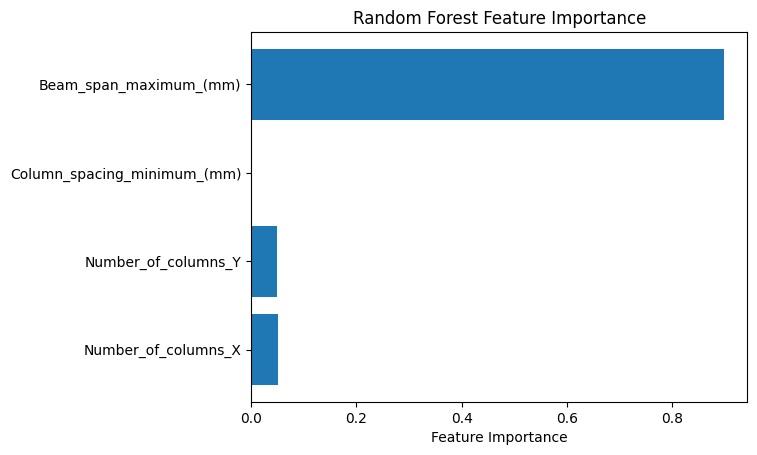

In [27]:
importances = clf.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

## Grid search

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # <-- géén 'auto'!
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_